In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cancer Dataset

In [27]:
df = pd.read_csv(r'./cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'],axis = 1)
Y = df['diagnosis']

In [29]:
splits = range(2,8)
random_states = [0, 42]
models = []
result = []
for split_size in splits:
    split_size = split_size / 10
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_size, random_state=random_state , shuffle=True)
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        models.append(model)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result.append(["DT","cancer", split_size, random_state, accuracy])

result_df = pd.DataFrame(result, columns=["model","dataset","test_size","random_state","accuracy_score"])
result_df

,model,dataset,test_size,random_state,accuracy_score
0,DT,cancer,0.2,0,0.903509
1,DT,cancer,0.2,42,0.929825
2,DT,cancer,0.3,0,0.918129
3,DT,cancer,0.3,42,0.923977
4,DT,cancer,0.4,0,0.907895
5,DT,cancer,0.4,42,0.929825
6,DT,cancer,0.5,0,0.922807
7,DT,cancer,0.5,42,0.943860
8,DT,cancer,0.6,0,0.923977
9,DT,cancer,0.6,42,0.944444


In [30]:
# On Best Split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0 )
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ac = accuracy_score(y_test, y_pred)
ac

0.9035087719298246

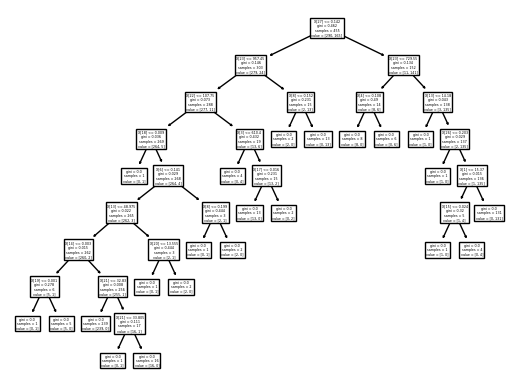

In [31]:
plot_tree(clf)
plt.show()

# Weather dataset

In [32]:
df = pd.read_csv(r'./weather.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [33]:
le = LabelEncoder()
df = df.apply(le.fit_transform)

In [34]:
X = df.drop(columns=['play'])
Y = df['play']
print(X.head())
Y.head()

   outlook  temp  humidity  windy
0        2     1         0      0
1        2     1         0      1
2        0     1         0      0
3        1     2         0      0
4        1     0         1      0


0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int32

In [35]:
splits = range(2,8)
random_states = [0, 42]
models = []
for split_size in splits:
    split_size = split_size / 10
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_size, random_state=random_state , shuffle=True)
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        models.append(model)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result.append(["DT","weather", split_size, random_state, accuracy])

result_df = pd.DataFrame(result, columns=["model","dataset","test_size","random_state","accuracy_score"])
result_df

,model,dataset,test_size,random_state,accuracy_score
0,DT,cancer,0.2,0,0.903509
1,DT,cancer,0.2,42,0.929825
2,DT,cancer,0.3,0,0.918129
3,DT,cancer,0.3,42,0.923977
4,DT,cancer,0.4,0,0.907895
5,DT,cancer,0.4,42,0.929825
6,DT,cancer,0.5,0,0.922807
7,DT,cancer,0.5,42,0.943860
8,DT,cancer,0.6,0,0.923977
9,DT,cancer,0.6,42,0.944444


In [36]:
result_df.to_excel('./DT_output.xlsx')